In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# DATA EXTRACTION

In [75]:
df = yf.download('FB',
start='2021-01-04',
end='2022-01-01',
adjusted=True,
progress=False)

# DATA PREPARATION

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,338.850006,347.869995,338.010010,346.179993,346.179993,17795000
2021-12-28,346.630005,352.709991,345.200012,346.220001,346.220001,16637600
2021-12-29,346.910004,349.690002,341.640015,342.940002,342.940002,10747000
2021-12-30,344.000000,347.230011,343.220001,344.359985,344.359985,10593300
2021-12-31,343.019989,343.440002,336.269989,336.350006,336.350006,12870500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-01-04 to 2021-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [12]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
df = df.asfreq('b')
df = df.fillna(method='ffill')

# EDA


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,321.104603,325.005357,317.408094,321.166230,321.166230,1.886804e+07
std,34.687415,34.471833,34.763011,34.853992,34.853992,8.319204e+06
min,247.899994,253.860001,244.610001,245.639999,245.639999,7.170700e+06
25%,300.252502,302.542496,297.012497,300.512505,300.512505,1.359765e+07
50%,329.639999,332.895004,325.809998,329.365005,329.365005,1.678050e+07
75%,344.542511,349.617508,341.347504,344.669991,344.669991,2.206910e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,6.565400e+07


<AxesSubplot:>

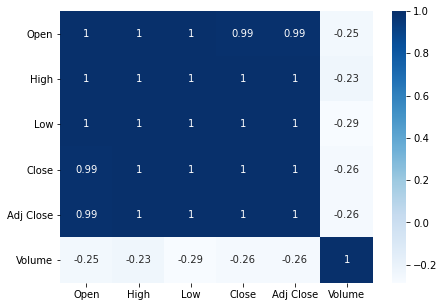

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [76]:
df['open-high'] = df['Open']-df['High']
df['open-low'] = df['Open'] - df['Low']
df['close-high'] = df['Close']-df['High']
df['close-low'] = df['Close'] - df['Low']
df['high-low'] = df['High'] - df['Low']
df['open-close'] = df['Open'] - df['Close']
df.head()

,Open,High,Low,Close,Adj Close,Volume,open-high,open-low,close-high,close-low,high-low,open-close
Date,,,,,,,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,-0.220001,9.579987,-6.059998,3.739990,9.799988,5.839996
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600,-4.109985,0.080017,-1.429993,2.760010,4.190002,-2.679993
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,-5.750000,1.989990,-4.440002,3.299988,7.739990,-1.309998
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,-5.709991,1.119995,-2.869995,3.959991,6.829987,-2.839996
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,-0.640015,5.130005,-1.380005,4.390015,5.770020,0.739990


<AxesSubplot:>

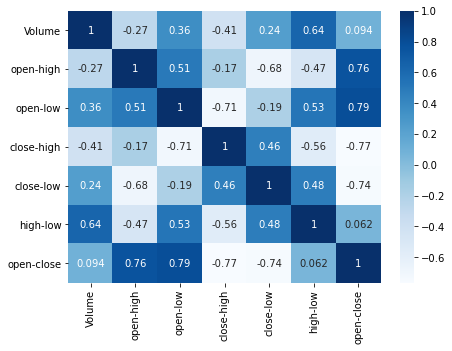

In [50]:
df2 = df.copy()
df2 = df.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(df2.corr(),cmap='Blues',annot=True)

the 'close-high' feature shows the most negative correlation with the ‘volume’ feature, while the ‘high-low’ feature shows the maximum value of correlation with the ‘volume’ feature.

In [52]:
df2['close-high']=abs(df2['close-high'])
# turing close-high values into postive for next graphical comparison with Volume 

In [56]:

fig = go.Figure(
    data=[
        go.Bar(name='close-high', x=df2.index, y=df2['close-high'], yaxis='y', offsetgroup=1),
        go.Bar(name='Volume', x=df2.index, y=df2['Volume'], yaxis='y2', offsetgroup=2)
    ],layout={
        'yaxis': {'title': 'close-high '},
        'yaxis2': {'title': 'Volume', 'overlaying': 'y', 'side': 'right'}
    }
)
 

fig.update_layout(barmode='group')
fig.show()

the graph indicate the volume of stocks traded is  for smaller values of close-high, with the most negative correlation value this may indicate that the closer the Close value to the high value the more shares are traded.

In [58]:

fig = go.Figure(
    data=[
        go.Bar(name='high-low', x=df2.index, y=df2['high-low'], yaxis='y', offsetgroup=1),
        go.Bar(name='Volume', x=df2.index, y=df2['Volume'], yaxis='y2', offsetgroup=2)
    ],layout={
        'yaxis': {'title': 'high-low'},
        'yaxis2': {'title': 'Volume', 'overlaying': 'y', 'side': 'right'}
    }
)

fig.update_layout(barmode='group')
fig.show()

the graph indicate the volume of stocks traded is high for larger values of high-low, with the high positive correlation value this may indicate that a great fluctuation in stock prices was the reason for a high number of shares traded in a stock.

# Calculating the returns on the stock

In [92]:
df['Returns']=df['Close'].pct_change()

In [167]:
df['Returns'].head()

Date
2021-01-04         NaN
2021-01-05    0.007548
2021-01-06   -0.028269
2021-01-07    0.020622
2021-01-08   -0.004354
Name: Returns, dtype: float64

**What dates each bank stock had the best and worst single day returns**

In [71]:
df['Returns'].idxmin()
#day with worst return

Timestamp('2021-10-22 00:00:00')

In [72]:
df['Returns'].idxmax()
#day with best return

Timestamp('2021-04-29 00:00:00')

**which month was the riskiest to invest in?** 

In [163]:
Month=[]
Risk=[]
for x in range(12):  
    Month.append(calendar.month_name[x+1]) 
    Risk.append(df['Returns'].loc[(df.index.month==x+1)].std())

In [164]:

data = [Month,Risk]
 

MR = pd.DataFrame(data)
 
MR=MR.transpose()
MR.columns=['Month','Returns']


<AxesSubplot:>

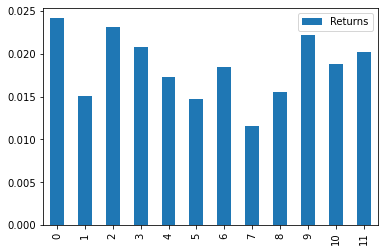

In [165]:
MR.plot(kind='bar')

In [166]:
print(MR['Month'].loc[(MR['Returns']==MR['Returns'].max())])

0    January
Name: Month, dtype: object


**January was the highest riskiest month to invest in**

## TIMES SERIES ANALYSIS AND ARIMA MODEL APPLICATION 

In [169]:
FB = yf.download('FB',
start='2021-01-04',
end='2022-01-01',
adjusted=True,
progress=False)

In [170]:
FB

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
...,...,...,...,...,...,...
2021-12-27,338.850006,347.869995,338.010010,346.179993,346.179993,17795000
2021-12-28,346.630005,352.709991,345.200012,346.220001,346.220001,16637600
2021-12-29,346.910004,349.690002,341.640015,342.940002,342.940002,10747000


In [171]:
fig = px.line(FB['Close'])
fig.show()

In [173]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [174]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [179]:
adf_check(FB['Close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7244772898423435
p-value : 0.4185472051062997
#Lags Used : 0
Number of Observations Used : 251
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [180]:
FB_diff = FB['Close'].diff().dropna()

In [181]:
fig = px.line(FB_diff)
fig.show()

In [182]:
adf_check(FB_diff)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -16.004191346359967
p-value : 6.461422809834836e-29
#Lags Used : 0
Number of Observations Used : 250
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


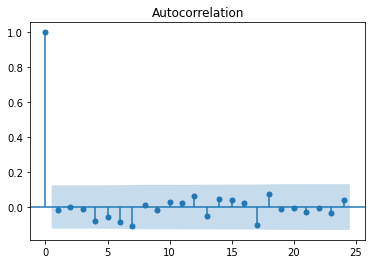

In [183]:
fig_df_diff_acf = plot_acf(FB_diff)

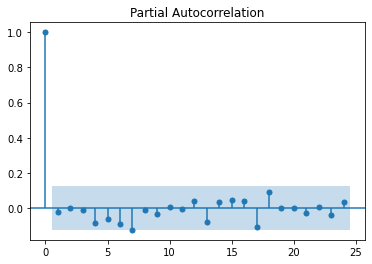

In [184]:
fig_df_diff_acf = plot_pacf(FB_diff)

In [185]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [186]:
FB = FB.asfreq('b')
FB = FB.fillna(method='ffill')

In [187]:
model = SARIMAX(FB.Close, order=(0, 1, 0))
results = model.fit()

In [188]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  260
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -822.012
Date:                Thu, 05 May 2022   AIC                           1646.024
Time:                        00:46:54   BIC                           1649.581
Sample:                    01-04-2021   HQIC                          1647.454
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        33.4384      2.383     14.029      0.000      28.767      38.110
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                12.10
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.05
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

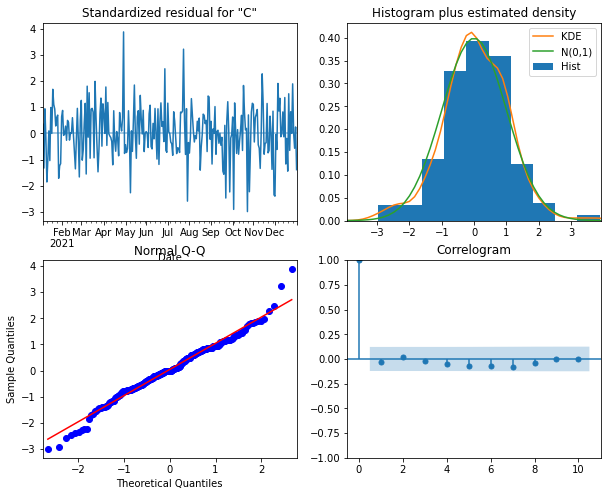

In [189]:
results.plot_diagnostics(figsize=(10,8));

The top left plot shows the residuals across the entire dataset. We can see how there is not trend, and the mean seems stable over time, which is indicative of stationarity, just like white noise.
from the Q-Q plot of the residuals We can see a thick straight line lying on y = x. This means that our residuals are normally distributed, just like white noise. 
Then, the top right plot shows a histogram of the residuals. We can see the shape of a normal distribution on this plot, which again indicates that the residuals are close to white noise, as white noise is normally distributed as well.
Finally, the bottom right plot shows the autocorrelation function of our residuals. We see how there is only a significant peak at lag 0, and no significant coefficients otherwise. This means that the residuals are not correlated, which further supports the conclusion that they are similar to white noise, which what we expect from a **good model**.

In [190]:
forecast_values=results.get_forecast(steps=21)

In [191]:
forecast_values.summary_frame() 

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-01-03,336.350006,5.782595,325.016328,347.683685
2022-01-04,336.350006,8.177825,320.321764,352.378248
2022-01-05,336.350006,10.015749,316.719499,355.980513
2022-01-06,336.350006,11.565191,313.682649,359.017363
2022-01-07,336.350006,12.930276,311.007131,361.692882
2022-01-10,336.350006,14.164408,308.588277,364.111735
2022-01-11,336.350006,15.299309,306.363911,366.336101
2022-01-12,336.350006,16.355649,304.293522,368.406490
2022-01-13,336.350006,17.347786,302.348971,370.351042
2022-01-14,336.350006,18.286172,300.509768,372.190244


In [192]:
pred_ci = forecast_values.conf_int()

Text(0, 0.5, 'price')

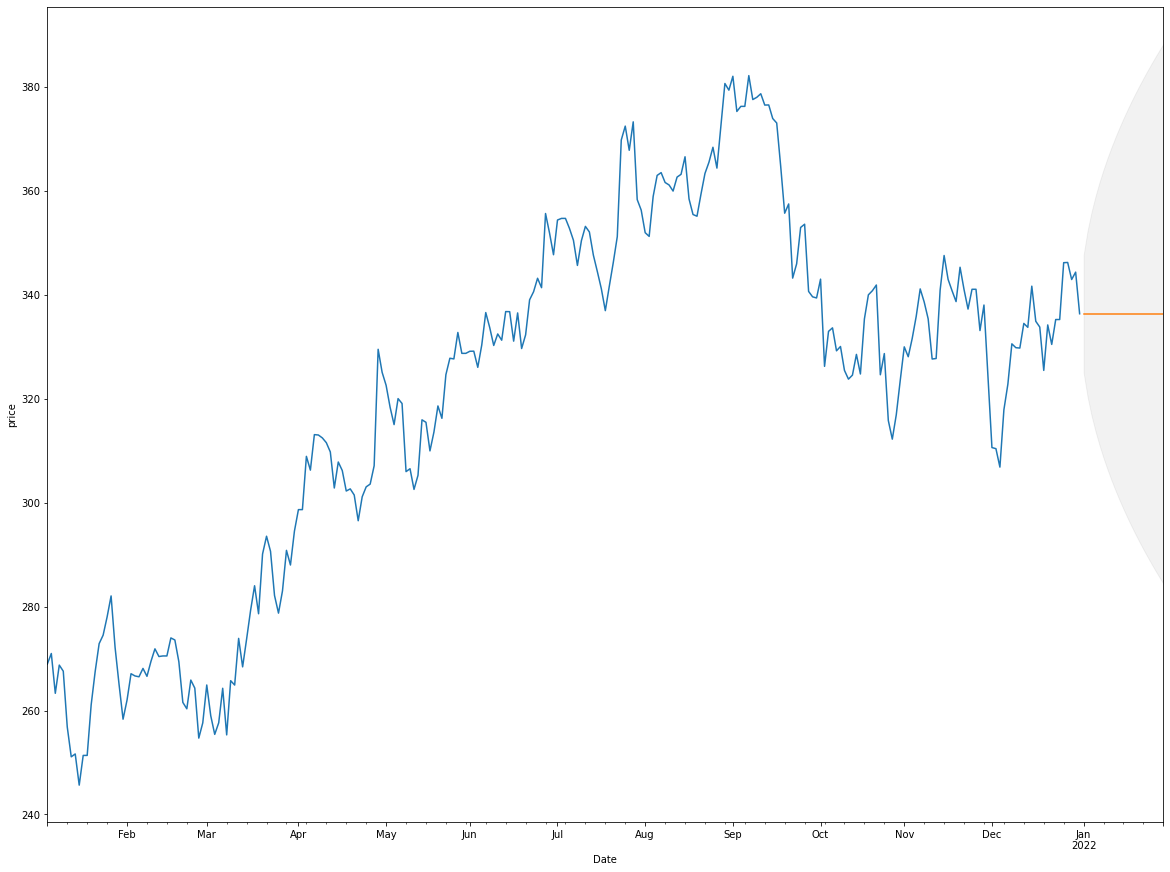

In [193]:
ax = FB['Close'].plot(label='observed', figsize=(20, 15))
forecast_values.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('price')